In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")
df.head()

,Unnamed: 0,index,locality,Price,Type_property,Sale_type,Number_bedrooms,Living_area,garden,surface_land,facades_number,building_state,garden_bool,provinces,m2price
0,0,1,6980,185000,mixed-use-building,for-sale,4,226,0,226,3,To be done up,False,Luxembourg,819.0
1,3,4,6870,295000,house,for-sale,6,229,0,229,4,To renovate,False,Luxembourg,1288.0
2,10,11,6800,150000,apartment,for-sale,1,48,0,48,4,As new,False,Luxembourg,3125.0
3,11,12,9300,370000,duplex,for-sale,3,175,0,175,2,As new,False,E.Fanders,2114.0
4,14,16,6061,190000,house,for-sale,5,145,0,145,2,To be done up,False,Hainaut,1310.0


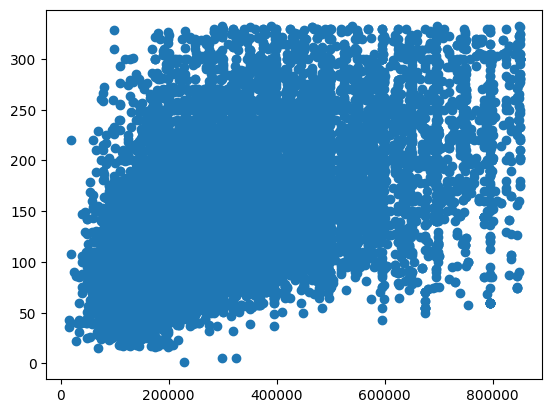

In [85]:
df.drop(['Unnamed: 0',"index"], axis=1, inplace=True)
df.head()
plt.scatter(df['Price'], df["Living_area"])
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


df_pr = df.drop(["locality","Sale_type","garden","surface_land","facades_number","Type_property","garden_bool","Number_bedrooms","m2price"], axis=1)
#df1 = pd.get_dummies(df_pr, columns = ['building_state'],drop_first=True)
df2 = pd.get_dummies(df_pr, columns = ['provinces'],drop_first=True)

df2["building_state"] = df2["building_state"].astype('category')
df2["building_state"] = df2["building_state"].cat.codes


df2.head()

# enc = LabelEncoder()
# scaler = StandardScaler()

# y = df["Price"].values.reshape(-1,1)
# X = df["Living_area"].values.reshape(-1,1)

# print(y.shape)
# print(X.shape)

,Price,Living_area,building_state,provinces_Brussel,provinces_E.Fanders,provinces_F.Brabant,provinces_Hainaut,provinces_Liege,provinces_Limbourg,provinces_Luxembourg,provinces_Namur,provinces_W.Flanders,provinces_W.brabant
0,185000,226,3,0,0,0,0,0,0,1,0,0,0
1,295000,229,4,0,0,0,0,0,0,1,0,0,0
2,150000,48,0,0,0,0,0,0,0,1,0,0,0
3,370000,175,0,0,1,0,0,0,0,0,0,0,0
4,190000,145,3,0,0,0,1,0,0,0,0,0,0


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

enc = LabelEncoder()
scaler = StandardScaler()

y = df["Price"].values.reshape(-1,1)
X = df2.drop("Price",axis=1).values

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=40)

ln = LinearRegression()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ln.fit(X_train,y_train)
y_pred = ln.predict(X_test)

print(y_pred)
print(r2_score(y_test, y_pred))
plt.scatter

print(y_test.shape)
print(X_test.shape)
print()

[[281943.18782518]
 [402433.91309426]
 [427156.56557633]
 ...
 [132733.04927772]
 [295611.96183089]
 [317170.97678143]]
0.5289163278364832
(4988, 1)
(4988, 12)



[281945.44583537 402431.23115678 427159.25162666 ... 132737.56587497
 295611.31019144 317169.58546512]
0.5289158467216238
0.5289158467216238


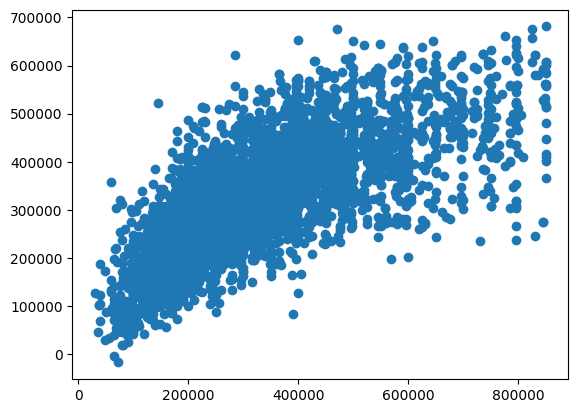

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

enc = LabelEncoder()
scaler = StandardScaler()

y = df["Price"].values.reshape(-1,1)
X = df2.drop("Price",axis=1).values

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=40)

ridge = Lasso()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

print(y_pred)
print(r2_score(y_test, y_pred))
print(ridge.score(X_test,y_test))

plt.scatter(y_test,y_pred)
plt.show()